In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.

import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

In [2]:
## Read file

data = pd.read_csv('data/2019-08-26-TOP_PAID-GAME_PUZZLE', sep=',', engine='python')

In [3]:
data.columns

Index(['app_id', 'developer_id', 'video', 'current_version', 'screenshots',
       'developer_url', 'size', 'category', 'recent_changes',
       'description_html', 'title', 'developer_email', 'interactive_elements',
       'score', 'developer', 'iap', 'updated', 'description', 'price', 'free',
       'histogram', 'required_android_version', 'editors_choice', 'icon',
       'iap_range', 'url', 'content_rating', 'reviews', 'installs'],
      dtype='object')

In [4]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
recent_changes,462,1.000000
description,462,1.000000
description_html,462,1.000000
iap_range,404,0.874459
interactive_elements,401,0.867965
video,182,0.393939
score,59,0.127706
developer_url,15,0.032468
installs,0,0.000000
developer_id,0,0.000000


In [5]:
def get_main_content_rating (row):
   return row['content_rating'].split('\'')[1]

data['content_rating_main'] = data.apply (lambda row: get_main_content_rating(row), axis=1)

data['content_rating_main']
data['content_rating_main'].value_counts()

Everyone        409
Teen             26
Everyone 10+     25
Mature 17+        2
Name: content_rating_main, dtype: int64

Text(0.5,1,'Box plot Score VS Content Rating')

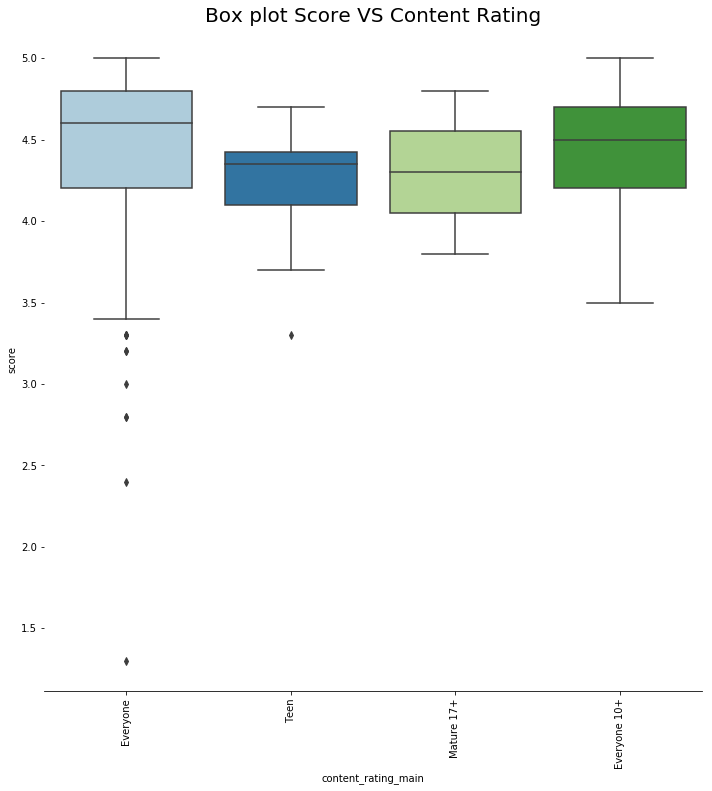

In [6]:
g = sns.catplot(x="content_rating_main",y="score",data=data, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("score")
plt.title('Box plot Score VS Content Rating',size = 20)

In [7]:
data['iap_range'].describe()

count                        58
unique                       26
top       ['Digital Purchases']
freq                         12
Name: iap_range, dtype: object

Text(0.5,1,'Distribution of Rating')

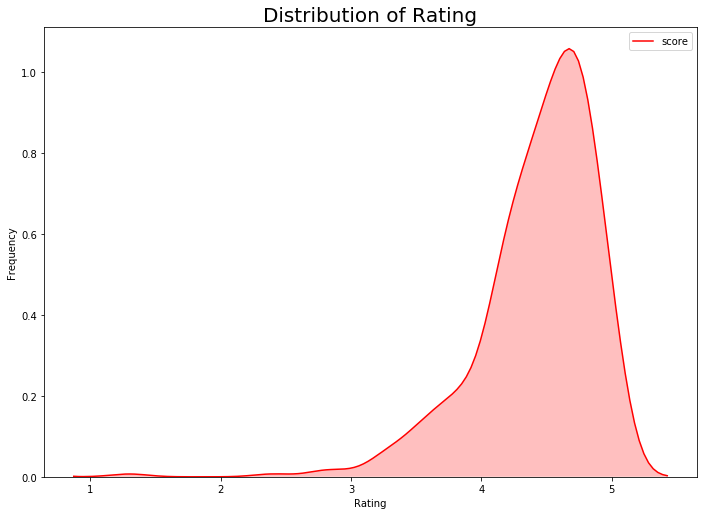

In [8]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.score, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

In [9]:
print( len(data['category'].unique()) , "categories")

print("\n", data['category'].unique())

6 categories

 ["['GAME_PUZZLE']" "['GAME_PUZZLE', 'FAMILY_BRAINGAMES']"
 "['GAME_PUZZLE', 'FAMILY_ACTION']" "['GAME_PUZZLE', 'FAMILY_CREATE']"
 "['GAME_PUZZLE', 'FAMILY_PRETEND']" "['GAME_PUZZLE', 'FAMILY_EDUCATION']"]


Text(0.5,1,'Count of app in each category')

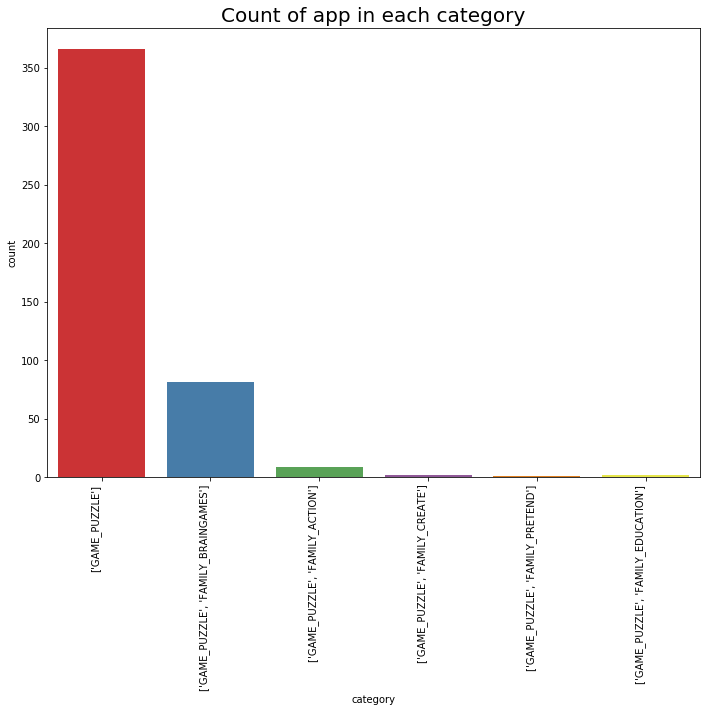

In [10]:
g = sns.countplot(x="category",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Count of app in each category',size = 20)

In [11]:
data['reviews'].head()

0        24
1     46420
2     90479
3    206570
4         0
Name: reviews, dtype: int64

Text(0.5,1,'Distribution of Reveiw')

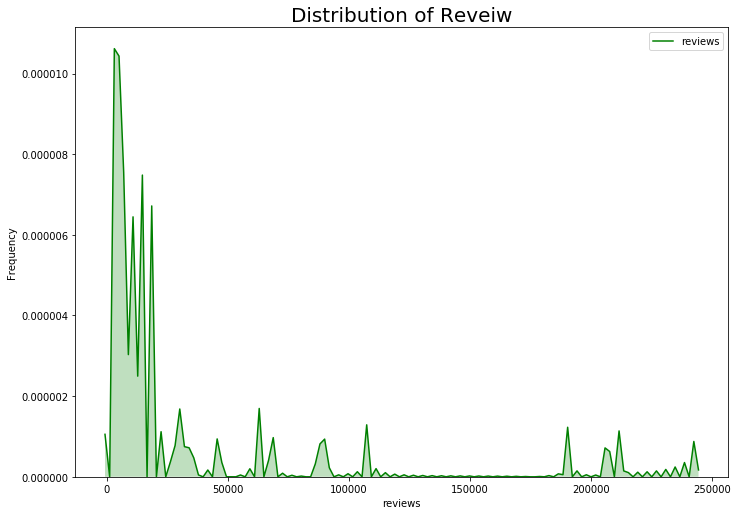

In [12]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data.reviews, color="Green", shade = True)
g.set_xlabel("reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

<Figure size 720x720 with 0 Axes>

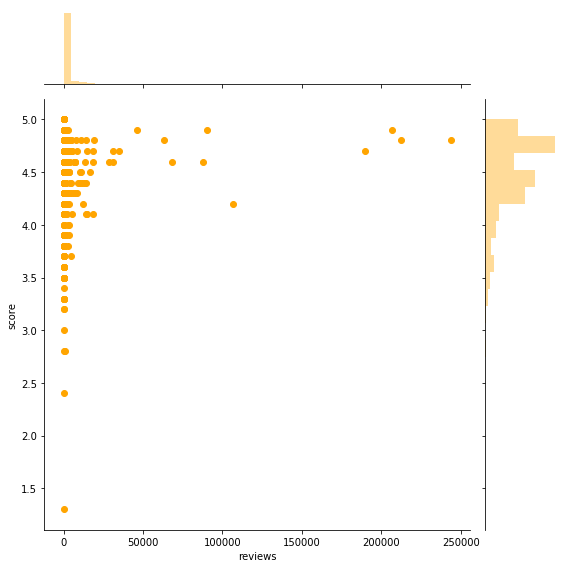

In [13]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="reviews", y="score",color = 'orange', data=data,size = 8);

Text(0.5,1,'Rating VS Reveiws')

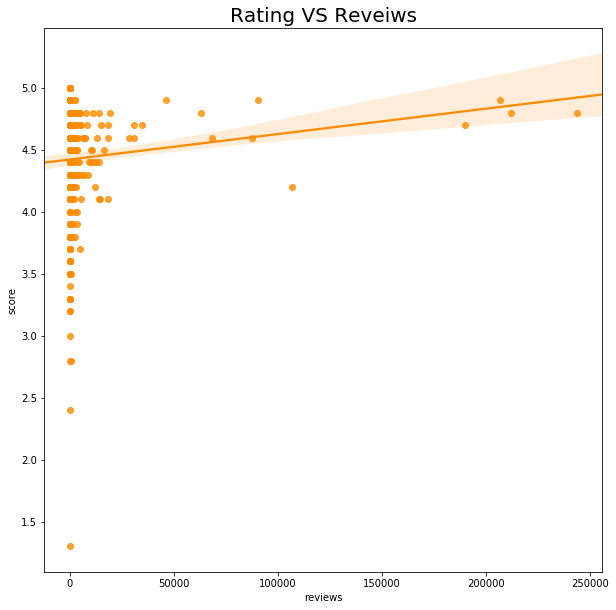

In [14]:
plt.figure(figsize = (10,10))
sns.regplot(x="reviews", y="score", color = 'darkorange',data=data[data['reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

In [15]:
data.price.unique()

array(['$4.49', '$4.99', '$3.99', '$1.99', '$6.99', '$13.60', '$1.49',
       '$0.99', '$2.99', '$5.99', '$2.49', '$1.77', '$3.41', '$9.99',
       '$1.00', '$9.49', '$3.49', '$1.62', '$8.99', '$1.59', '$1.01',
       '$4.00', '$5.49', '$1.50', '$1.03', '$2.00', '0', '$2.66',
       '$29.99', '$1.20', '$1.98'], dtype=object)

In [16]:
data['price'].value_counts().head(30)

$0.99     138
$1.99     128
$2.99      57
$4.99      37
$3.99      28
$1.49      20
$2.49      13
$3.49       6
$5.99       5
$1.00       4
$1.01       2
$9.99       2
$2.00       2
$8.99       2
$4.49       2
$1.03       1
$3.41       1
$13.60      1
$9.49       1
$6.99       1
$1.98       1
$29.99      1
$1.62       1
$4.00       1
$1.77       1
$5.49       1
$1.20       1
$1.50       1
$1.59       1
0           1
Name: price, dtype: int64

In [17]:
data.price = data.price.apply(lambda x: x.replace('$',''))
data['price'] = data['price'].apply(lambda x: float(x))

In [18]:
data['price'].describe()

count    462.000000
mean       2.412251
std        2.045368
min        0.000000
25%        0.990000
50%        1.990000
75%        2.990000
max       29.990000
Name: price, dtype: float64

In [19]:
data[data['price'] == 29.99]

,app_id,developer_id,video,current_version,screenshots,developer_url,size,category,recent_changes,description_html,...,histogram,required_android_version,editors_choice,icon,iap_range,url,content_rating,reviews,installs,content_rating_main
384,com.designsforstrongminds.strongmindpuzzles,Designs+for+Strong+Minds,NaN,4.0.5,[],http://designsforstrongminds.com,47M,['GAME_PUZZLE'],NaN,NaN,...,{},4.1 and up,False,https://lh3.googleusercontent.com/IWTQn9yeAwCb...,NaN,https://play.google.com/store/apps/details?id=...,['Everyone'],0,5+,Everyone


Text(0.5,1,'Scatter plot Score VS Price')

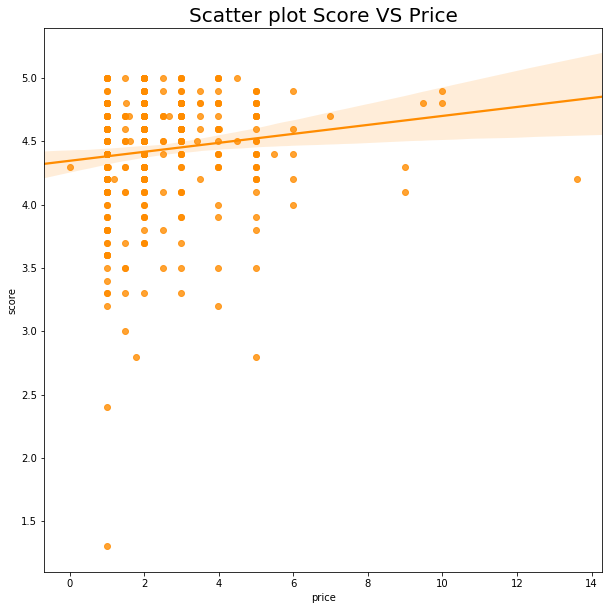

In [20]:
plt.figure(figsize = (10,10))
sns.regplot(x="price", y="score", color = 'darkorange',data=data[data['reviews']<1000000]);
plt.title('Scatter plot Score VS Price',size = 20)

In [21]:
data.loc[ data['price'] == 0, 'PriceBand'] = '0 Free'
data.loc[(data['price'] > 0) & (data['price'] <= 0.99), 'PriceBand'] = '1 cheap'
data.loc[(data['price'] > 0.99) & (data['price'] <= 2.99), 'PriceBand']   = '2 not cheap'
data.loc[(data['price'] > 2.99) & (data['price'] <= 4.99), 'PriceBand']   = '3 normal'
data.loc[(data['price'] > 4.99) & (data['price'] <= 14.99), 'PriceBand']   = '4 expensive'
data.loc[(data['price'] > 14.99), 'PriceBand']   = '5 too expensive'


In [22]:
data[['PriceBand', 'score']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,score
0,0 Free,4.300000
1,1 cheap,4.274074
2,2 not cheap,4.493396
3,3 normal,4.488406
4,4 expensive,4.484615
5,5 too expensive,NaN


Text(0.5,1,'Boxen plot Score VS PriceBand')

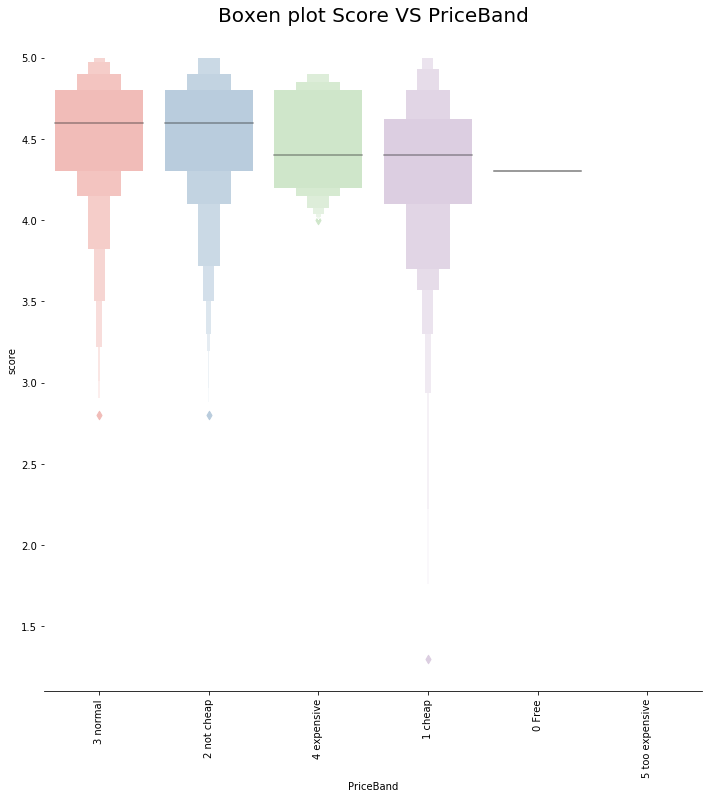

In [23]:
g = sns.catplot(x="PriceBand",y="score",data=data, kind="boxen", height = 10 ,palette = "Pastel1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("score")
plt.title('Boxen plot Score VS PriceBand',size = 20)